In [1]:
#Llamar al dataloader
%run DataLoader.ipynb

# Análisis de tweets por ubicación y veracidad

In [2]:
#TODO: Mover al archivo que tiene el análisis de nulos
#Verificamos que el dataset no tenga ningúna fila que contenga la cadena de texto 'NaN'
#ya que vamos a tener que reemplazar los valores nulos por ese string para que el análisis sea bueno
len(dataset[(dataset.keyword.str.contains('NaN')) |\
        (dataset.location.str.contains('NaN')) |\
        (dataset.text.str.contains('NaN'))])

0

In [3]:
#Hacemos un fillna porque a la hora de hacer group by, buscar duplicados o hacer un pivot
#los NaN generan un mal resultado
dataset = dataset.fillna(value='NaN')

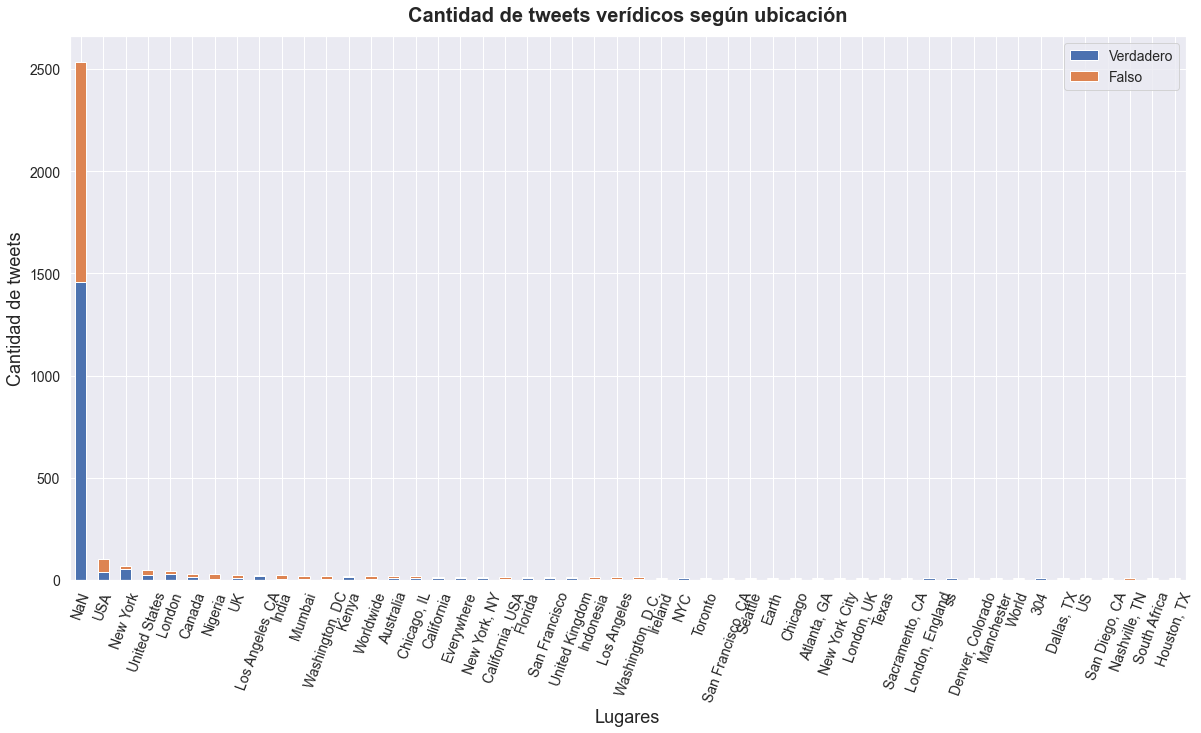

In [4]:
dataset = dataset.groupby(['location', 'target']).agg({'target': 'count'})
dataset.columns = ['Cantidad']
dataset = dataset.reset_index()
dataset = dataset.pivot_table(index = 'location', columns = 'target', values = 'Cantidad', fill_value = 0)
dataset.columns = ['Verdadero', 'Falso']
dataset['Total'] = dataset.Verdadero + dataset.Falso
dataset = dataset.sort_values(by = 'Total', ascending=False)
dataset = dataset.drop(columns = ['Total']).head(50)

fig, ax = plt.subplots()
dataset.plot.bar(ax = ax, stacked = True)
plt.ylabel('Cantidad de tweets')
plt.xlabel("Lugares")
plt.xticks(rotation=70)
plt.title('Cantidad de tweets verídicos según ubicación', pad = 15)
plt.show()

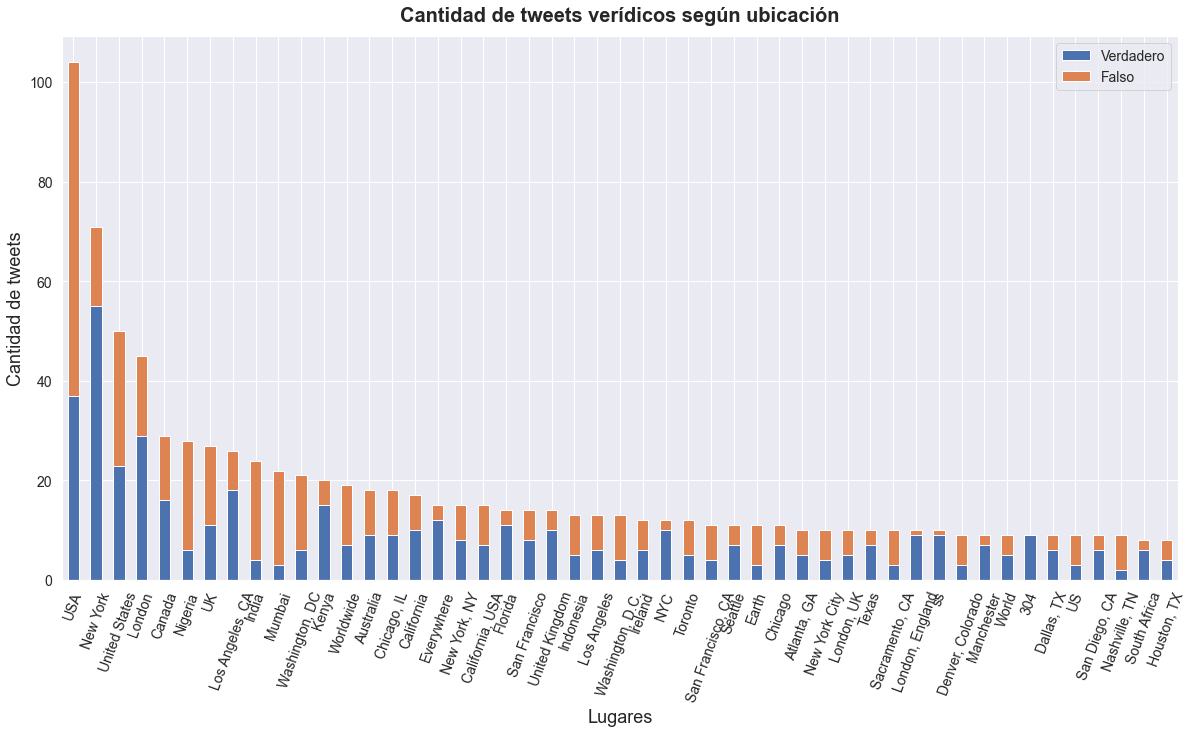

In [5]:
#Debido a la enorme cantidad de tweets con locaciones nulas, merece hacer un nuevo grafico sin ellas

dataset = dataset[dataset.index != 'NaN']

fig, ax = plt.subplots()
dataset.plot.bar(ax = ax, stacked = True)
plt.ylabel('Cantidad de tweets')
plt.xlabel("Lugares")
plt.xticks(rotation=70)
plt.title('Cantidad de tweets verídicos según ubicación', pad = 15)
plt.show()